In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [6]:
def mc_prediction(policy, env, num_episodes, gamma=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        gamma: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = {}
    returns_count = {}
    
    # The final value function
    V = {}
    
    for episode in range(num_episodes):
        
        # env.reset() resets the env by dealing new cards and returns the
        # starting state (sum of hand, one dealer card, usable ace) as a tupe.
        St = env.reset()
        seq_states, seq_rewards, terminate = [], [], False
        
        # Iterate through episode until termination
        while not terminate:
        
            At = policy(St)
            
            # env.step() takes action At and returns the new state
            # as a tuple, the reward for taking action At and a flag
            # that is True if we end up in the terminal state. For some
            # reason, step() also returns an empty dict that we ignore.
            St_new, Rt, terminate, _ = env.step(At)
            
            # Append state and given reward to sequence and
            # move to the new state after taking action At.
            seq_states.append(St)
            seq_rewards.append(Rt)
            St = St_new
            
        # Now that we have terminated we update the average return
        # of all states that we visited during this particular episode.
        for idx, s in enumerate(set(seq_states)):
            
            # Get index of first visit
            fv = seq_states.index(s)
            
            # Create key in dict if not exist
            if s not in returns_sum:
                returns_sum[s] = 0
                returns_count[s] = 0
            
            # Compute sampled return from state
            G = 0
            for t, Rt in enumerate(seq_rewards[fv:]):
                G += (gamma ** t) * Rt
            
            # Update value function estimation of state
            returns_sum[s] += G
            returns_count[s] += 1
            V[s] = returns_sum[s] / returns_count[s]

    return V    

In [7]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

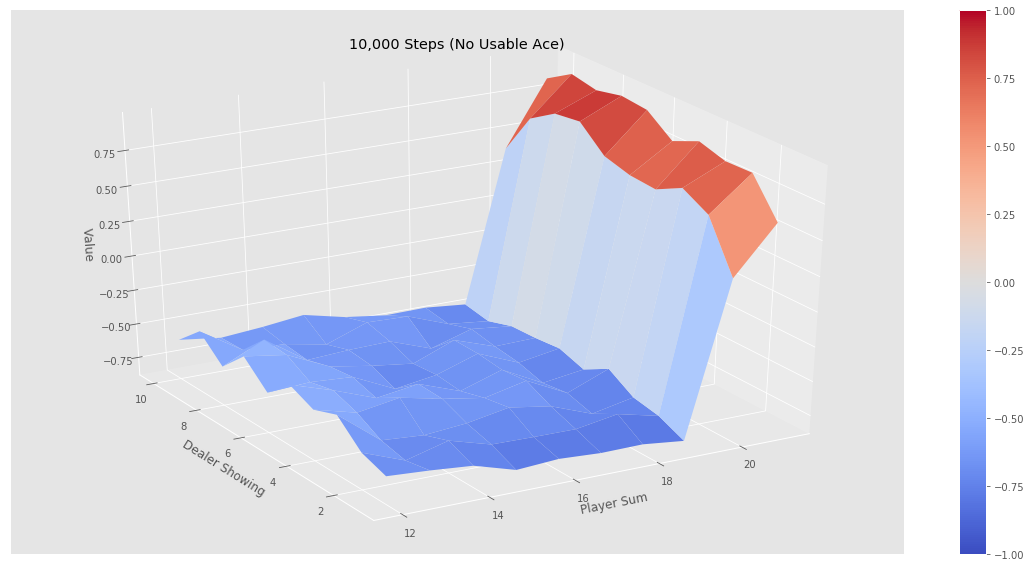

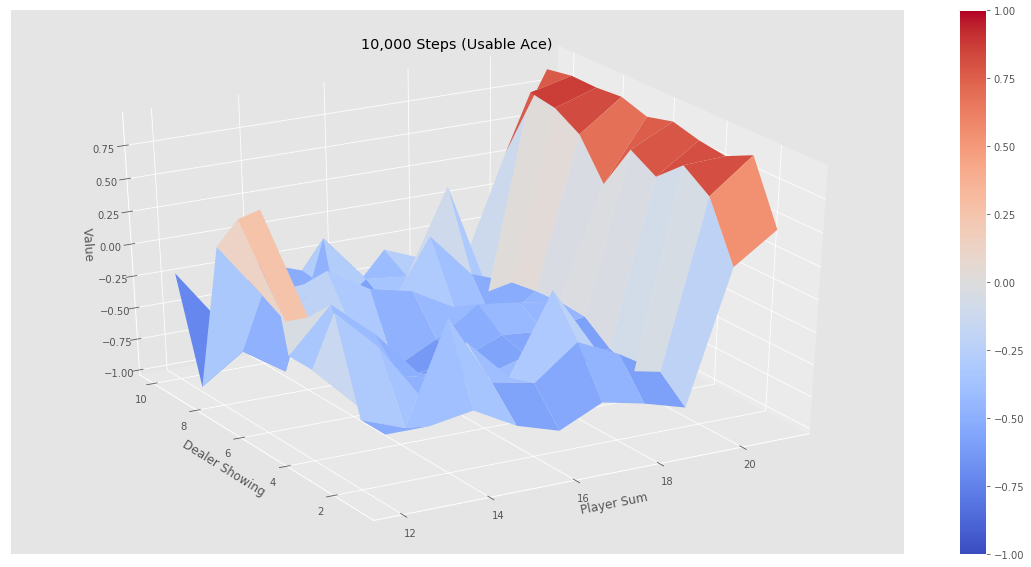

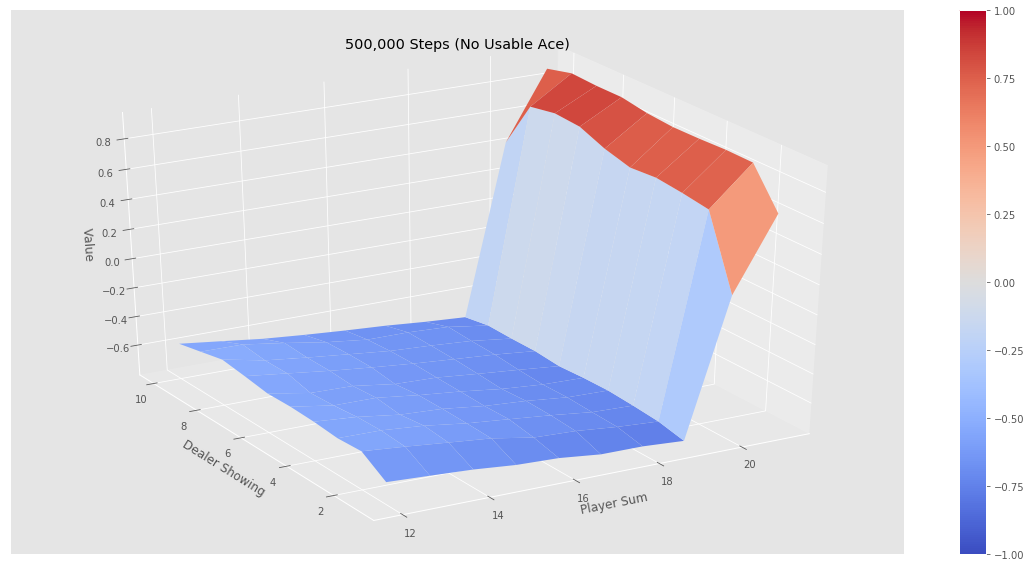

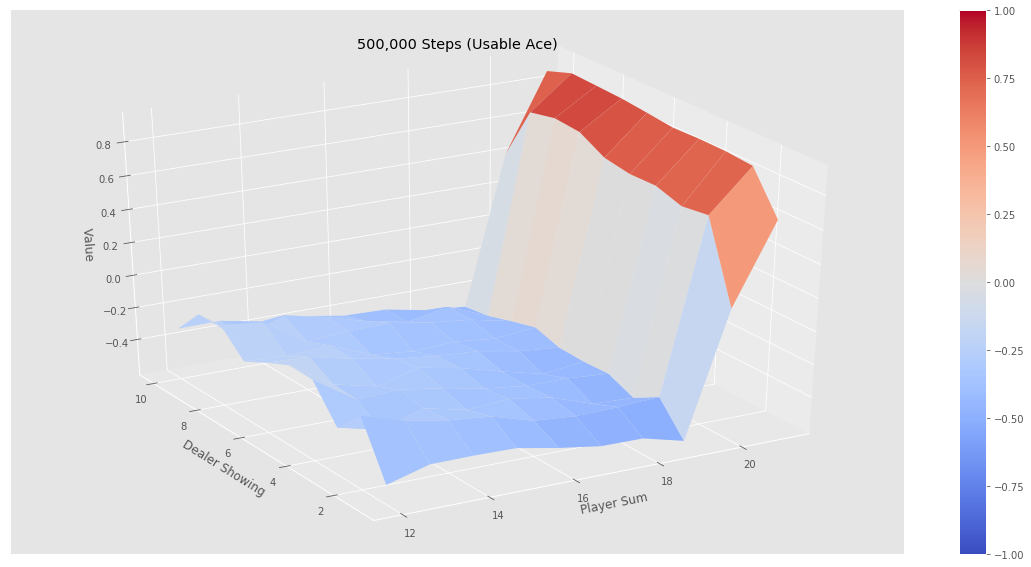

In [8]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")